In [20]:
import pandas as pd

df = pd.read_csv('location_mean.csv') #GPS DATA
df_1 = pd.read_csv('app_new-Copy1.csv') #app used changed name
df_2 = pd.read_csv('notification_grouped.csv') #notification day-by-day hour-by-hour
df_3 = pd.read_csv('activities_timediaries.csv') #timediaries

df = df.drop(['Unnamed: 0'], axis = 1)
df_1 = df_1.drop(['Unnamed: 0'], axis = 1)

In [2]:
df #GPS DATA

,timestamp,lat,long,alt
0,2022-10-10 09:06:00,45.789440,10.970795,219.000000
1,2022-10-10 09:07:00,45.525685,10.820885,155.125000
2,2022-10-10 09:08:00,45.544973,10.824474,213.857143
3,2022-10-10 09:11:00,45.547240,10.825280,207.000000
4,2022-10-10 09:16:00,45.596750,10.842260,-1.000000
...,...,...,...,...
15499,2022-10-25 13:43:00,46.056085,11.120800,256.500000
15500,2022-10-25 13:44:00,46.056275,11.120625,233.500000
15501,2022-10-25 13:45:00,46.056173,11.121037,214.333333
15502,2022-10-25 13:46:00,46.056110,11.121680,270.000000


In [2]:
df_1

,timestamp,applicationname
0,2022-10-11 23:59:00,Samsung One UI Home
1,2022-10-11 23:59:00,Samsung One UI Home
2,2022-10-11 23:59:00,Samsung One UI Home
3,2022-10-11 23:59:00,Samsung One UI Home
4,2022-10-11 23:59:00,Samsung One UI Home
...,...,...
246807,2022-10-22 00:00:00,Samsung One UI Home
246808,2022-10-22 00:00:00,Samsung One UI Home
246809,2022-10-22 00:00:00,Samsung One UI Home
246810,2022-10-22 00:00:00,Samsung One UI Home


In [3]:
df_1 = df_1[df_1.applicationname != 'Samsung One UI Home'] #remove system application
df_1 = df_1[df_1.applicationname != 'Android']#remove system apps
df_1 = df_1[df_1.applicationname != 'Android User Interface']
df_1 = df_1[df_1.applicationname.notnull()] #remove nan when I was sleeping and didn't use anything
df_1

,timestamp,applicationname
363,2022-10-11 23:29:00,WhatsApp
364,2022-10-11 23:29:00,WhatsApp
366,2022-10-11 23:28:00,Clock
367,2022-10-11 23:28:00,Clock
368,2022-10-11 23:28:00,Clock
...,...,...
240977,2022-10-22 08:15:00,WhatsApp
240978,2022-10-22 08:14:00,WhatsApp
240979,2022-10-22 08:14:00,WhatsApp
240980,2022-10-22 08:14:00,WhatsApp


In [4]:
apps_usage = df_1.drop(['timestamp'], axis = 1)
df = apps_usage['applicationname'].value_counts() #I use so many, to plot I want to show the first 20
df

YouTube                     35803
Instagram                   15826
Music                       10833
WhatsApp                     7199
Clock                        6403
Facebook                     2989
i-Log                        2659
Telegram                     2476
Google Chrome                2217
MyFitnessPal App             1221
Best Fiends Game             1064
Twitter                       970
Muoversi in Trentino          962
Google Maps                   780
Gallery                       712
Google Docs                   542
OpenMove                      402
Trentastico!                  402
GMail                         346
Camera                        343
UniTrento App                 261
Archivio                      201
Settings                      195
Samsung Email                 179
Spotify                       161
Messages                      152
LinkedIN                      122
Dialer                        120
Intesa Sanpaolo Mobile        120
Samsung Health

<AxesSubplot:>

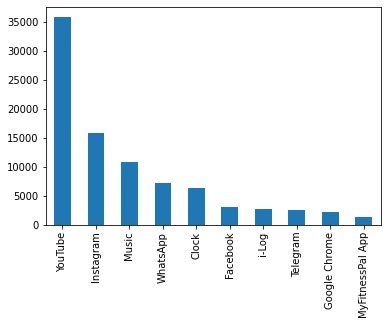

In [7]:
apps_usage['applicationname'].value_counts()[:10].plot(kind = 'bar')

In [68]:
df_2 = pd.read_csv('notification_grouped.csv')
df_2 = df_2.rename(columns = {'package': 'number of notifications'})
df_2 = df_2.drop(['Unnamed: 0'], axis = 1)
df_2 #Grouped notifications

,timestamp,number of notifications
0,2022-10-10 09:00:00,117
1,2022-10-10 10:00:00,112
2,2022-10-10 11:00:00,137
3,2022-10-10 12:00:00,25
4,2022-10-10 13:00:00,928
...,...,...
271,2022-10-25 10:00:00,126
272,2022-10-25 11:00:00,55
273,2022-10-25 12:00:00,104
274,2022-10-25 13:00:00,36


,number of notifications
count,16.000000
mean,1089.937500
std,299.939876
min,673.000000
25%,830.750000
50%,1108.000000
75%,1292.000000
max,1651.000000


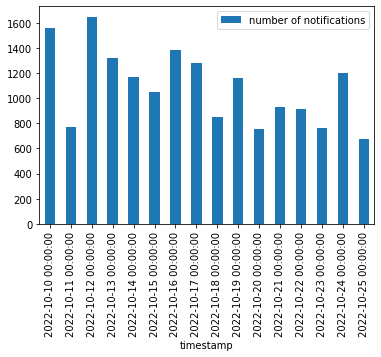

In [31]:
#New dataframe to see how many notification I get in a day
import numpy as np
notbyday = df_2
notbyday['timestamp'] = pd.to_datetime(notbyday['timestamp'])
notbyday['timestamp'] = notbyday['timestamp'].dt.floor('D')
notbyday = notbyday.groupby('timestamp').sum()
notbyday = notbyday.reset_index(level=0)
notbyday.set_index('timestamp').plot(kind = 'bar')
notbyday.describe()

In [69]:
df_2.describe()

,number of notifications
count,276.000000
mean,63.184783
std,75.335892
min,1.000000
25%,21.000000
50%,45.500000
75%,85.250000
max,928.000000


In [70]:
df_2

,timestamp,number of notifications
0,2022-10-10 09:00:00,117
1,2022-10-10 10:00:00,112
2,2022-10-10 11:00:00,137
3,2022-10-10 12:00:00,25
4,2022-10-10 13:00:00,928
...,...,...
271,2022-10-25 10:00:00,126
272,2022-10-25 11:00:00,55
273,2022-10-25 12:00:00,104
274,2022-10-25 13:00:00,36


<AxesSubplot:title={'center':'Notifications recived on 17th October 2022'}, xlabel='Hours', ylabel='Number of Notification Recived'>

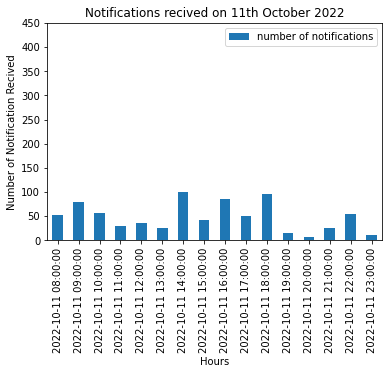

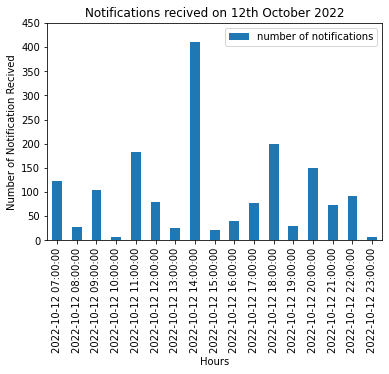

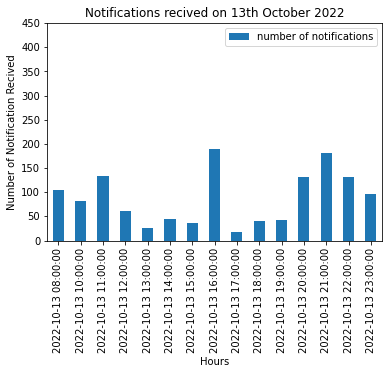

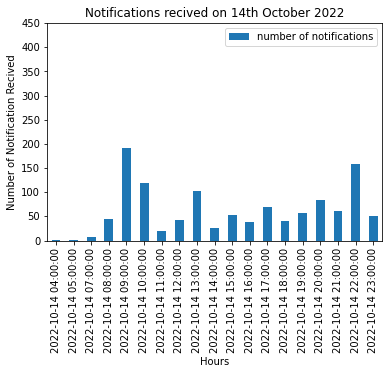

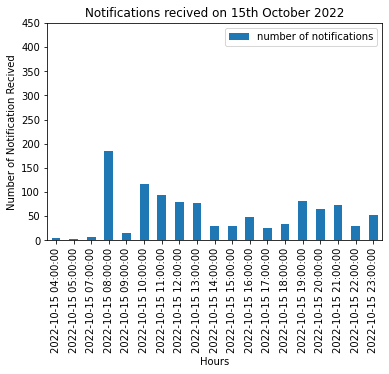

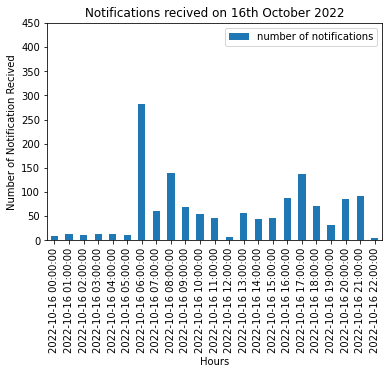

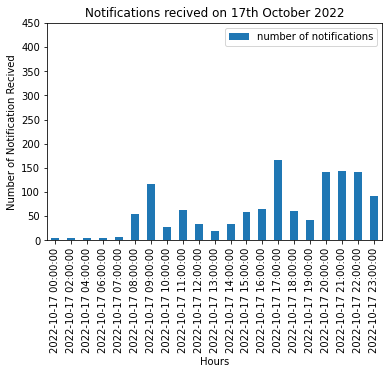

In [74]:
df_2[df_2['timestamp'].str.startswith('2022-10-11')].set_index('timestamp').plot(kind = 'bar',
                                                          xlabel = 'Hours', 
                                                          ylabel = 'Number of Notification Recived',
                                                          title = 'Notifications recived on 11th October 2022',
                                                          ylim = (0,450))

df_2[df_2['timestamp'].str.startswith('2022-10-12')].set_index('timestamp').plot(kind = 'bar',
                                                          xlabel = 'Hours', 
                                                          ylabel = 'Number of Notification Recived',
                                                          title = 'Notifications recived on 12th October 2022',
                                                          ylim = (0,450))

df_2[df_2['timestamp'].str.startswith('2022-10-13')].set_index('timestamp').plot(kind = 'bar',
                                                          xlabel = 'Hours', 
                                                          ylabel = 'Number of Notification Recived',
                                                          title = 'Notifications recived on 13th October 2022',
                                                          ylim = (0,450))

df_2[df_2['timestamp'].str.startswith('2022-10-14')].set_index('timestamp').plot(kind = 'bar',
                                                          xlabel = 'Hours', 
                                                          ylabel = 'Number of Notification Recived',
                                                          title = 'Notifications recived on 14th October 2022',
                                                          ylim = (0,450))

df_2[df_2['timestamp'].str.startswith('2022-10-15')].set_index('timestamp').plot(kind = 'bar',
                                                          xlabel = 'Hours', 
                                                          ylabel = 'Number of Notification Recived',
                                                          title = 'Notifications recived on 15th October 2022',
                                                          ylim = (0,450))

df_2[df_2['timestamp'].str.startswith('2022-10-16')].set_index('timestamp').plot(kind = 'bar',
                                                          xlabel = 'Hours', 
                                                          ylabel = 'Number of Notification Recived',
                                                          title = 'Notifications recived on 16th October 2022',
                                                          ylim = (0,450))

df_2[df_2['timestamp'].str.startswith('2022-10-17')].set_index('timestamp').plot(kind = 'bar',
                                                          xlabel = 'Hours', 
                                                          ylabel = 'Number of Notification Recived',
                                                          title = 'Notifications recived on 17th October 2022',
                                                          ylim = (0,450))

In [ ]:
### Histograms day-by-day, I mistakenly canceled the previous week but the code is the same

df_2[df_2['timestamp'].str.startswith('2022-10-18')].set_index('timestamp').plot(kind = 'bar',
                                                          xlabel = 'Hours', 
                                                          ylabel = 'Number of Notification Recived',
                                                          title = 'Notifications recived on 18th October 2022',
                                                          ylim = (0,450))

df_2[df_2['timestamp'].str.startswith('2022-10-19')].set_index('timestamp').plot(kind = 'bar',
                                                          xlabel = 'Hours', 
                                                          ylabel = 'Number of Notification Recived',
                                                          title = 'Notifications recived on 19th October 2022',
                                                          ylim = (0,450))

df_2[df_2['timestamp'].str.startswith('2022-10-20')].set_index('timestamp').plot(kind = 'bar',
                                                          xlabel = 'Hours', 
                                                          ylabel = 'Number of Notification Recived',
                                                          title = 'Notifications recived on 20th October 2022',
                                                          ylim = (0,450))

df_2[df_2['timestamp'].str.startswith('2022-10-21')].set_index('timestamp').plot(kind = 'bar',
                                                          xlabel = 'Hours', 
                                                          ylabel = 'Number of Notification Recived',
                                                          title = 'Notifications recived on 21th October 2022',
                                                          ylim = (0,450))

df_2[df_2['timestamp'].str.startswith('2022-10-22')].set_index('timestamp').plot(kind = 'bar',
                                                          xlabel = 'Hours', 
                                                          ylabel = 'Number of Notification Recived',
                                                          title = 'Notifications recived on 22th October 2022',
                                                          ylim = (0,450))

df_2[df_2['timestamp'].str.startswith('2022-10-23')].set_index('timestamp').plot(kind = 'bar',
                                                          xlabel = 'Hours', 
                                                          ylabel = 'Number of Notification Recived',
                                                          title = 'Notifications recived on 23th October 2022',
                                                          ylim = (0,450))

df_2[df_2['timestamp'].str.startswith('2022-10-24')].set_index('timestamp').plot(kind = 'bar',
                                                          xlabel = 'Hours', 
                                                          ylabel = 'Number of Notification Recived',
                                                          title = 'Notifications recived on 24th October 2022',
                                                          ylim = (0,450))

Grafici da fare giorno per giorno

In [2]:
df_3

,datetime,time,weekday,what,where,with_whom,mood
0,2022-10-25 13:30:00,13:30:00,Tuesday,Personal care,Home apartment /room,Alone,😁
1,2022-10-25 13:00:00,13:00:00,Tuesday,Personal care,Home apartment /room,Alone,😁
2,2022-10-25 12:30:00,12:30:00,Tuesday,Travelling,Changing locality,By bus/tram,NaN
3,2022-10-25 12:00:00,12:00:00,Tuesday,Other,Other university place,Alone,😁
4,2022-10-25 11:30:00,11:30:00,Tuesday,Other,Other university place,Alone,😁
...,...,...,...,...,...,...,...
713,2022-10-10 11:30:00,11:30:00,Monday,"Cooking, food preparation & management",Home apartment /room,Roommate(s),🙂
714,2022-10-10 11:00:00,11:00:00,Monday,"Cooking, food preparation & management",Home apartment /room,Roommate(s),😁
715,2022-10-10 10:30:00,10:30:00,Monday,"Cooking, food preparation & management",Home apartment /room,Roommate(s),😁
716,2022-10-10 10:00:00,10:00:00,Monday,Travelling,Study,By bus/tram,NaN


<AxesSubplot:title={'center':'General activities tracking'}, xlabel='activities', ylabel='Number of entries'>

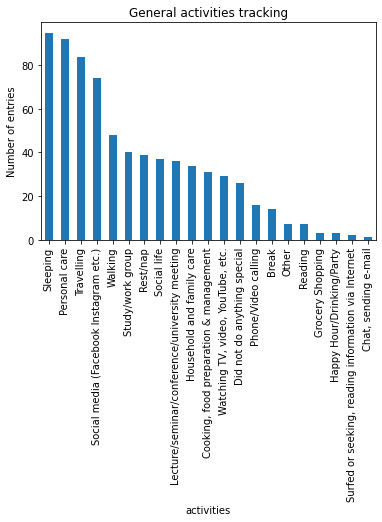

In [18]:
df_3['what'].value_counts().plot(kind='bar', title = 'General activities tracking', xlabel = 'activities',
                                 ylabel = 'Number of entries')